In [1]:
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Unsupervised Learning Final Project

In [2]:
X_train = pd.read_csv(
    'train/X_train.txt',
    delim_whitespace=True,  
    header=None             
)

y_train = pd.read_csv(
    'train/y_train.txt',
    delim_whitespace=True, 
    header=None             
)

X_test= pd.read_csv(
    'test/X_test.txt',
    delim_whitespace=True,  
    header=None             
)

y_test = pd.read_csv(
    'test/y_test.txt',
    delim_whitespace=True,  
    header=None             
)




### The Dataset 

The dataset consists of features with 561 dimensions which were extracted from raw accelerometer and gyroscope signals collected from multiple body positions of volunteers.  
These features capture various statistical and frequency-domain characteristics derived from the sensor data.

The recorded activities correspond to the following six categories:

1. **WALKING**
2. **WALKING_UPSTAIRS**
3. **WALKING_DOWNSTAIRS**
4. **SITTING**
5. **STANDING**
6. **LAYING**

Each sample in the dataset represents a short time window during which the volunteer performed one of these activities, providing the foundation for supervised learning tasks such as activity recognition.


In [5]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### Taking a Closer Look at the Data

On examining the histogram of the dataset’s feature means, we observe that many features exhibit a **right-skewed distribution**.  
Such skewness is not ideal for most machine learning models, particularly those that assume or benefit from normally distributed input data.

To address this issue, we will create a scaled version of our training data, referred to as **`X_train_scaled`** and **`y_train_scaled`**.  
Feature scaling will help normalize the distributions, improving the convergence behavior of optimization algorithms and enhancing overall model performance.

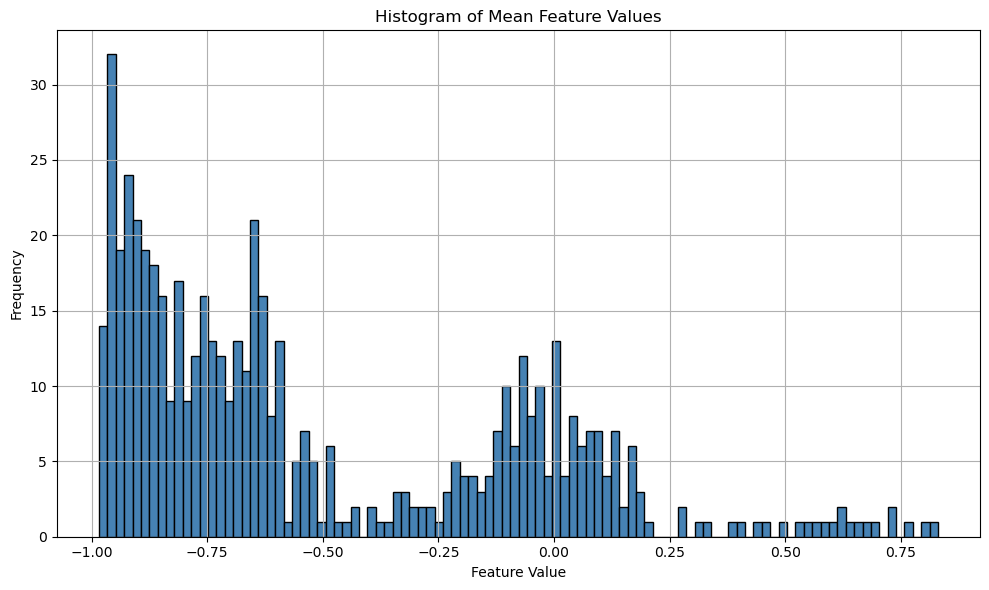

In [13]:
all_values = X_train.mean()

plt.figure(figsize=(10, 6))
plt.hist(all_values, bins=100, color='steelblue', edgecolor='black')
plt.title('Histogram of Mean Feature Values')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Scaled Data 

As you see, now the data has a more normal-like distribution around 0. StandardScaler scales the data around its mean being 0 and units of standard deviation. Meaning, now the mean of the data is 0, and standard deviation is 1.

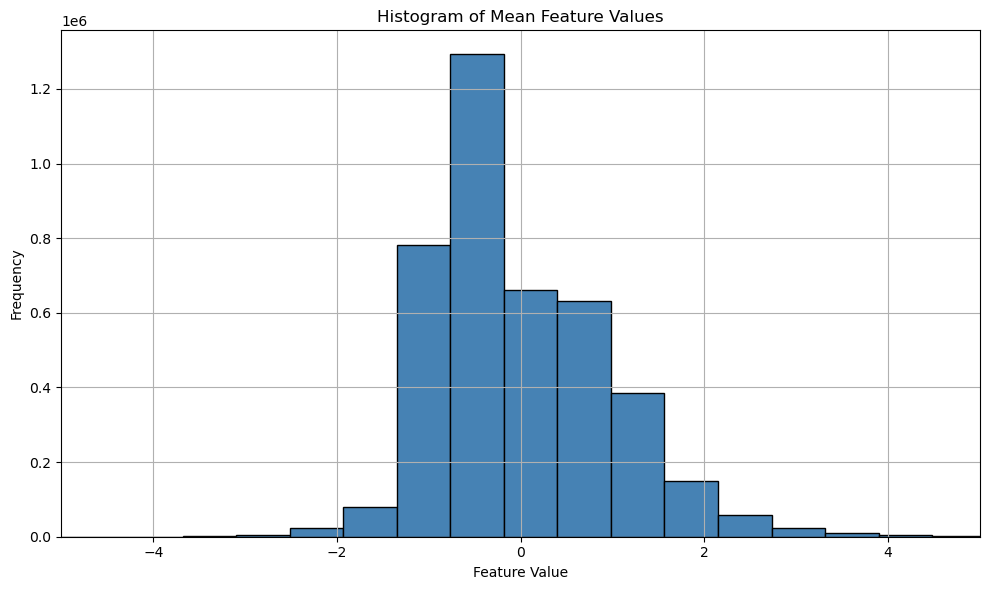

In [98]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)


all_values = X_train_scaled.flatten()

plt.figure(figsize=(10, 6))
plt.hist(all_values, bins=100, color='steelblue', edgecolor='black')
plt.title('Histogram of Mean Feature Values')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.xlim(-5, 5)
plt.show()



# Principal Component Analysis (PCA)

The dataset contains a very high dimensional feature space, consisting of **561 features**.  
For many machine learning algorithms, such a large number of features is excessive and can lead to issues such as overfitting and increased computational cost.

To address this, we will apply **Principal Component Analysis (PCA)**.  

By reducing the number of features, PCA will help streamline the training process and potentially improve model performance and accuracy.

In [64]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_scaled)

print(pca.explained_variance_ratio_.sum())

0.6016828933283968


As you see, with just 3 features we can explain 60% of the variance in our data. This means that our data is likely seperable, meaning we can train a classifier on it. 


### PCA Scatter Plot

When examining the PCA scatter plot projected onto two dimensions, we observe **distinct separation** between several of the activities:

- The **walking activities** (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS) are clearly separated from the **stationary activities** (SITTING, STANDING, LAYING).
- Within the walking activities themselves, we can also distinguish meaningful separation among WALKING, WALKING_UPSTAIRS, and WALKING_DOWNSTAIRS.

However, the **stationary activities** (SITTING, STANDING, and LAYING) appear to overlap significantly in the two-dimensional projection.  
This overlap may be due to the limited information captured by just two principal components. Higher-dimensional projections could potentially reveal further separation between these classes.

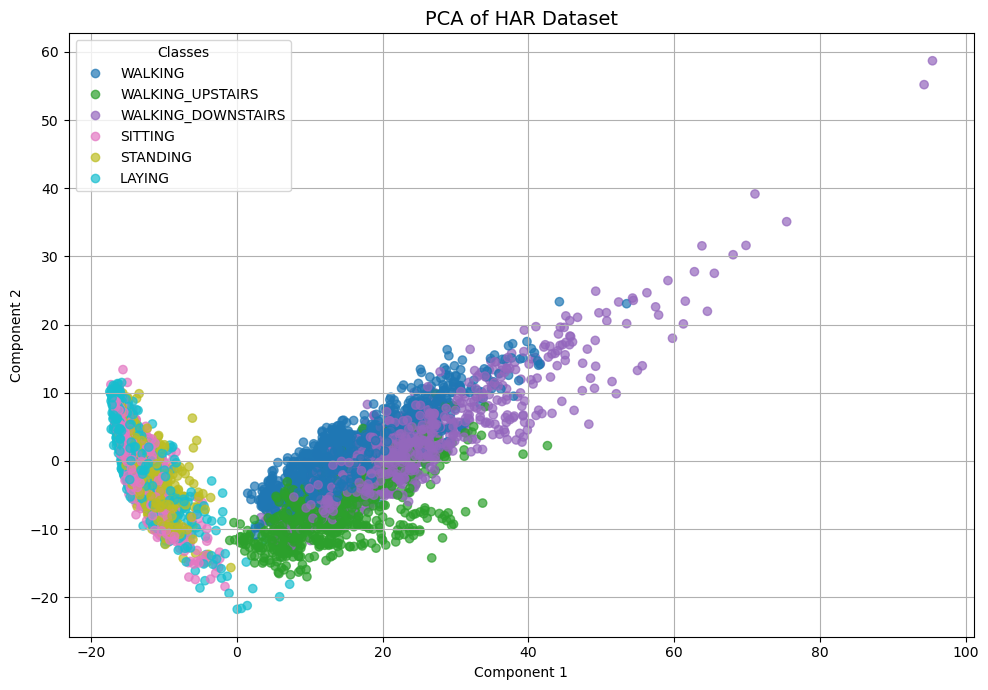

In [ ]:
import plotly.express as px


label_mapping = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}


def plot_component_graph(data,title):

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=y_train.values.ravel(), cmap='tab10', alpha=0.7)

    plt.title(title, fontsize=14)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

    handles, _ = scatter.legend_elements()
    labels_to_use = [label_mapping[i] for i in range(1, 7)]
    plt.legend(handles, labels_to_use, title="Activity")

    plt.tight_layout()
    plt.grid(True)
    plt.show()


plot_component_graph(data=X_pca,title="PCA of HAR Dataset")

### 3D PCA Visualization

When projecting the data into **three principal components**, we observe that the third component provides additional separation among the **SITTING**, **STANDING**, and **LAYING** activities.  
This highlights that subtle differences between these stationary activities, which were not easily distinguishable in two dimensions, become more apparent in higher-dimensional projections.

This observation is important to keep in mind when training a classifier:  
**Using more principal components can help preserve critical class-specific information, potentially leading to improved classification accuracy.**  
Balancing the number of components is essential to maintain enough information while avoiding unnecessary complexity.

In [73]:
def plot_component_graph3d(data,title):
    pca_df = pd.DataFrame(data, columns=['PC1', 'PC2', 'PC3'])
    pca_df['Labels'] = y_train.values.ravel()


    pca_df['Activity'] = pca_df['Labels'].map(label_mapping)

    fig = px.scatter_3d(
        pca_df, x='PC1', y='PC2', z='PC3',
        color='Activity',
        title=title
    )
    fig.show()

plot_component_graph3d(data=X_pca,title="3D PCA of HAR Dataset")

### Cumulative Explained Variance 

Looking at our graph of cumulative explained variance with the number of features used we see that there is an initial sharp increase with diminishing returns afterwards. Looking at our graph, the first 3 principle components explain 60% of the variance in our data, while it takes the remaining 558 to explain the remaining 40%. 

Therefore we will use a relatively small number of princple components since it will still be able to explain the variance in our data without excessive dimensionality. 

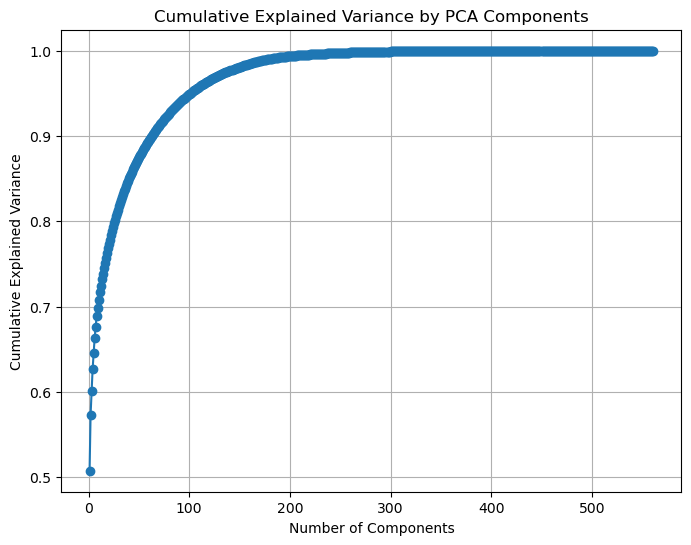

In [80]:
testPCA = PCA(n_components=561)
testPCA.fit(X_train_scaled)

cumulative_explained_variance = testPCA.explained_variance_ratio_.cumsum()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(testPCA.explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Logistic Regression Classifier on PCA 

We will fit a Logistic Regression Classifier on our PCA output in an attempt to create a model to predict activity based on the feature.  

With 3 PCA components we can see a 74.8% accuracy on our test data.

In [191]:
def train_PCAlogreg(n_comp,max_iter):
    trainPCA = PCA(n_components=n_comp)
    Xtrain_pca = trainPCA.fit_transform(X_train)
    Xtest_pca = trainPCA.transform(X_test)

    pca_df = pd.DataFrame(Xtrain_pca)

    clf = LogisticRegression(max_iter=max_iter)

    clf.fit(pca_df, y_train[0])


    y_pred = clf.predict(Xtest_pca)

    return clf, y_pred, accuracy_score(y_test, y_pred)




_, _, acc = train_PCAlogreg(n_comp=3,max_iter=500)
print("Model accuracy: {}".format(acc))


Model accuracy: 0.7482185273159145


### Number of principle components and model accuracy

We will test how the number of principle components used results in our model accuracy

In [192]:

start = 3 
step = 5 
limit = 200


accuracy_scores = []
num_components = []
for i in range(start,limit,step):
    _, _, acc = train_PCAlogreg(n_comp=i,max_iter=500)
    accuracy_scores += [acc]
    num_components += [i]



As expected, we see our model accuracy rise as the number of components used increases. We once again notice the diminishing returns on accuracy as the number of principle components used increases. This pattern in similar to the explained variance as the number of principle components increases

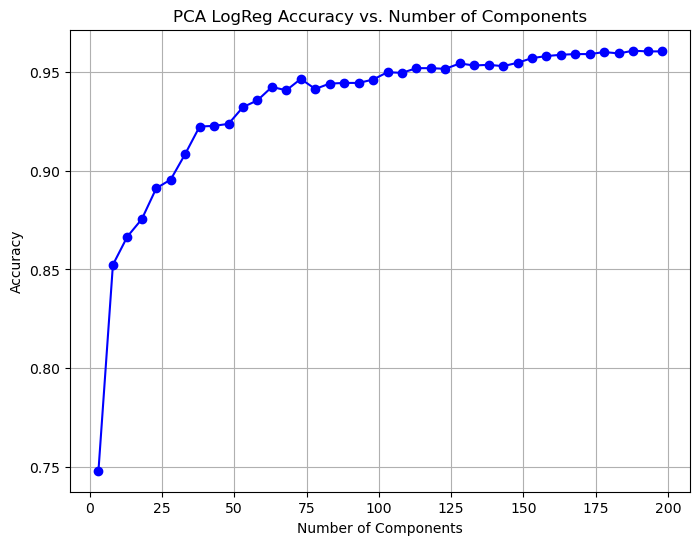

In [193]:
# Plotting the accuracy vs number of components
plt.figure(figsize=(8, 6))
plt.plot(num_components, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('PCA LogReg Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### Confusion Matrix

Next, we examine the confusion matrix for our trained model.  
For clarity, we have set the diagonal elements (correct classifications) to **NaN** so that we can focus on the misclassifications.

The confusion matrix align well with the insights we gained from our earlier PCA analysis:

- The most frequent misclassifications occur between **STANDING** and **SITTING**, as well as between **WALKING_UPSTAIRS** and **WALKING**.  
  This is consistent with the PCA projections, which showed that these activity pairs had less clear separation compared to others.

- There is very little confusion between **STANDING/SITTING/LAYING** activities and the **WALKING-related** activities.  
  This also matches our earlier observations: the PCA scatter plots revealed strong separation between stationary and walking activities.


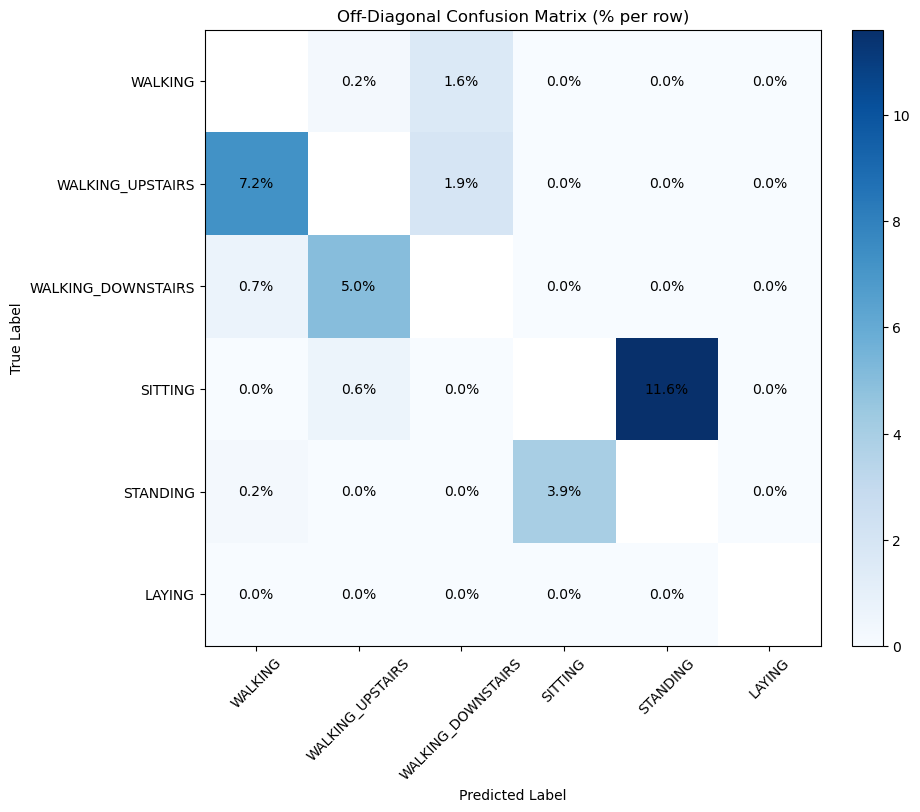

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np 

model,y_pred,_ = train_PCAlogreg(73,500)

cm = confusion_matrix(y_test, y_pred)

cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

np.fill_diagonal(cm_percent, np.nan) 

plt.figure(figsize=(10, 8))
im = plt.imshow(cm_percent, interpolation='nearest', cmap='Blues')

plt.title("Off-Diagonal Confusion Matrix (% per row)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar(im, fraction=0.046, pad=0.04)

n_classes = cm.shape[0]
for i in range(n_classes):
    for j in range(n_classes):
        if i != j:
            value = cm_percent[i, j]
            if not np.isnan(value):
                plt.text(j, i, f"{value:.1f}%", ha="center", va="center", color="black")
                


plt.xticks(np.arange(n_classes), [label_mapping[i] for i in range(1, n_classes + 1)], rotation=45)
plt.yticks(np.arange(n_classes), [label_mapping[i] for i in range(1, n_classes + 1)])
plt.show()